# Generating figure for the denoising results of Galaxy #38

In this notebook we reproduce the denoising results shown in figure 3 of the paper. We start by loading the data and the results.

In [37]:
%matplotlib notebook

import numpy as np
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.pyplot as plt

ground_truth = np.load('denoising_ground_truth_galaxy.npy')
observation = np.load('denoising_observed_galaxy.npy')
solution_score = np.load('denoising_score_galaxy.npy')
solution_sra = np.load('denoising_sparse_galaxy.npy')

Now we compute the residuals of the solutions and set the plot parameters.

In [38]:
#Compute residuals
residual_score = np.abs(observation-solution_score)
residual_sra = np.abs(observation-solution_sra)

#Set plot parameters
colormap = 'viridis'
interpol = 'Nearest'
#set the rcParams
plt.rcParams['figure.autolayout'] = False
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20 
plt.rcParams['font.size'] = 16 
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5 
plt.rcParams['legend.fontsize'] = 14 
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'cm'
plt.rcParams['axes.titlepad'] = 6

label_gt = 'Ground Truth'
label_obs = 'Observation'
label_sra = 'SRA'
label_score = 'SCORE'

Finally, we plot the figures. We start with the restored images.

<IPython.core.display.Javascript object>


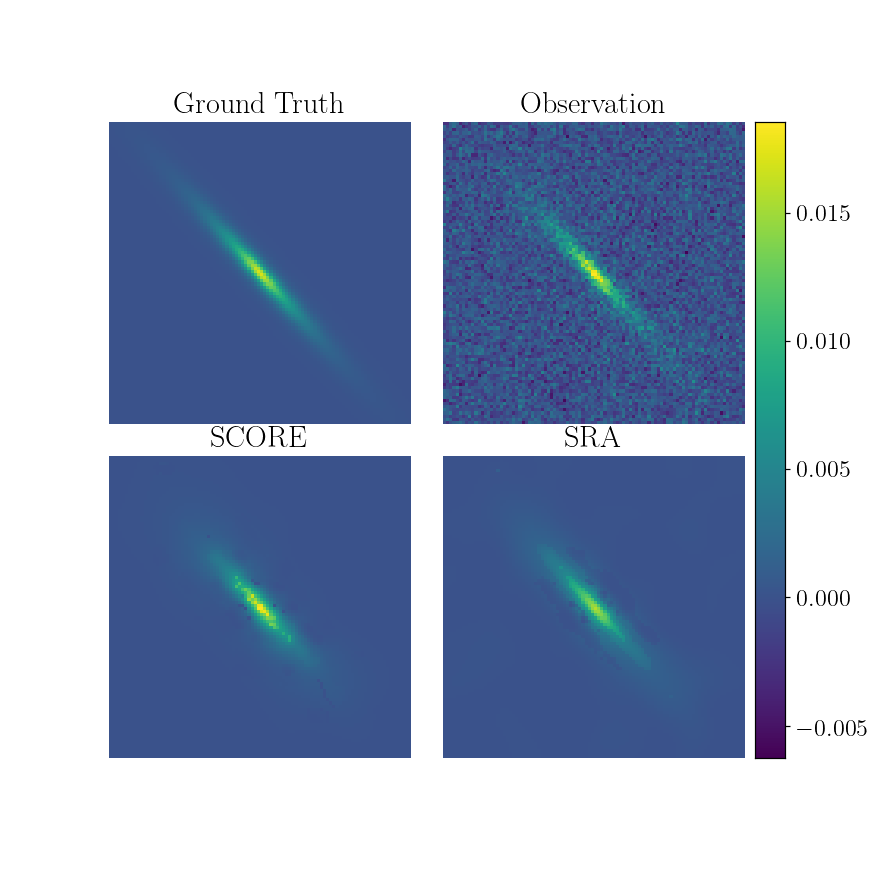

In [39]:
images = [ground_truth,observation,solution_score,solution_sra]
labels = [label_gt,label_obs,label_score,label_sra]
    
v_max = np.max((ground_truth,observation,solution_score,solution_sra))
v_min = np.min((ground_truth,observation,solution_score,solution_sra))

fig = plt.figure(figsize=(8, 8))

grid = AxesGrid(fig, 111,
                nrows_ncols=(2, 2),
                axes_pad=0.3,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

for i,ax in enumerate(grid):
    ax.set_axis_off()
    im = ax.imshow(images[i], cmap = colormap, interpolation=interpol, vmin=v_min, vmax=v_max)
    ax.set_title(labels[i])

# when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

cbar = ax.cax.colorbar(im)
cbar = grid.cbar_axes[0].colorbar(im)

plt.show()

We finish with the residuals of both reconstruction methods.

<IPython.core.display.Javascript object>


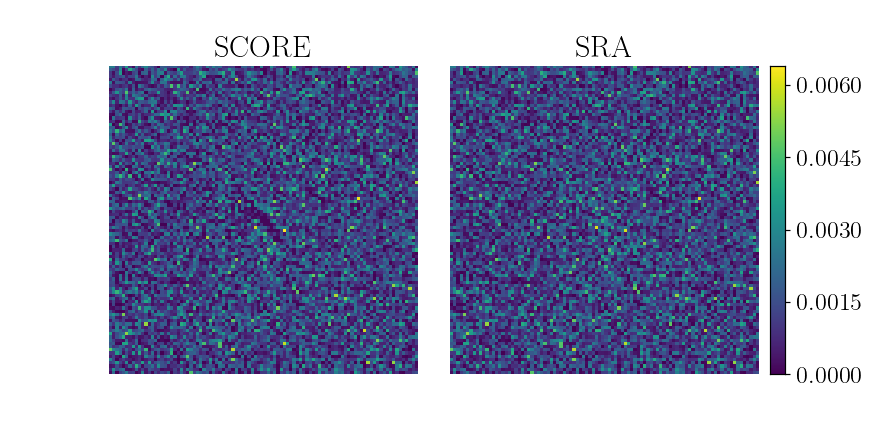

In [42]:
residuals = [residual_score,residual_sra]
labels = [label_score,label_sra]

v_max = np.max((residual_score,residual_sra))
v_min = 0

fig = plt.figure(figsize=(8, 4))

grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.3,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

for i,ax in enumerate(grid):
    ax.set_axis_off()
    im = ax.imshow(residuals[i], cmap = colormap, interpolation=interpol, vmin=v_min, vmax=v_max)
    ax.set_title(labels[i])

cbar = ax.cax.colorbar(im)
cbar = grid.cbar_axes[0].colorbar(im)
plt.show()